In [1]:
import pprint
import json

In [2]:
import CaboCha

In [3]:
c = CaboCha.Parser()

In [4]:
sentence = 'ゆく河の流れは絶えずして、しかももとの水にあらず。淀みに浮かぶうたかたは、かつ消えかつ結びて、久しくとどまりたるためしなし。世の中にある人とすみかと、またかくのごとし。'

In [5]:
tree = c.parse(sentence)

In [6]:
pp = pprint.PrettyPrinter(indent=4)

pp.pprint(tree)

<CaboCha.Tree; proxy of <Swig Object of type 'CaboCha::Tree *' at 0x112066660> >


In [7]:
for i in range(tree.chunk_size()):
    chunk = tree.chunk(i)
    print('Chunk:', i)
    print(' Score:', chunk.score)
    print(' Link:', chunk.link)
    print(' Size:', chunk.token_size)
    print(' Pos:', chunk.token_pos)
    print(' Head:', chunk.head_pos) # 主辞
    print(' Func:', chunk.func_pos) # 機能語
    print(' Features:')
    for j in range(chunk.feature_list_size):
        print(chunk.feature_list(j))
    print('----')

Chunk: 0
 Score: 0.7608441710472107
 Link: 1
 Size: 1
 Pos: 0
 Head: 0
 Func: 0
 Features:
SHS:ゆく
SHP0:動詞
SHP1:自立
SHF:基本形
SFS:ゆく
SFP0:動詞
SFP1:自立
SFF:基本形
SLS:ゆく
SLP0:動詞
SLP1:自立
SLF:基本形
SRS:ゆく
SRP0:動詞
SRP1:自立
SRF:基本形
LF:ゆく
RL:ゆく
RH:ゆく
RF:ゆく
SBOS:1
a:基本形
----
Chunk: 1
 Score: 2.25746750831604
 Link: 2
 Size: 2
 Pos: 1
 Head: 0
 Func: 1
 Features:
SCASE:の
SHS:河
SHP0:名詞
SHP1:一般
SFS:の
SFP0:助詞
SFP1:連体化
SLS:河
SLP0:名詞
SLP1:一般
SRS:の
SRP0:助詞
SRP1:連体化
LF:の
RL:河
RH:河
RF:の
GCASE:の
a:の
----
Chunk: 2
 Score: 0.5786755084991455
 Link: 3
 Size: 2
 Pos: 3
 Head: 0
 Func: 1
 Features:
SCASE:は
SHS:流れ
SHP0:名詞
SHP1:一般
SFS:は
SFP0:助詞
SFP1:係助詞
SLS:流れ
SLP0:名詞
SLP1:一般
SRS:は
SRP0:助詞
SRP1:係助詞
LF:は
RL:流れ
RH:流れ
RF:は
GCASE:は
a:は
----
Chunk: 3
 Score: 1.3796308040618896
 Link: 7
 Size: 4
 Pos: 5
 Head: 1
 Func: 2
 Features:
SCASE:て
GPUNC:、
SPUNC:、
SHS:し
SHP0:動詞
SHP1:自立
SHF:連用形
SFS:て
SFP0:助詞
SFP1:接続助詞
SLS:絶えず
SLP0:副詞
SLP1:一般
SRS:、
SRP0:記号
SRP1:読点
LF:て
RL:絶えず
RH:し
RF:て
GCASE:て
a:て
----
Chunk: 4
 Score: 1.8483779430389404

In [8]:
for i in range(tree.token_size()):
    token = tree.token(i)
    print('Surface:', token.surface)
    print(' Normalized:', token.normalized_surface)
    print(' Feature:', token.feature)
    print(' NE:', token.ne) # 固有表現
    print(' Info:', token.additional_info)
    print(' Chunk:', token.chunk)
    print('----')

Surface: ゆく
 Normalized: ゆく
 Feature: 動詞,自立,*,*,五段・カ行促音便ユク,基本形,ゆく,ユク,ユク
 NE: None
 Info: None
 Chunk: <CaboCha.Chunk; proxy of <Swig Object of type 'CaboCha::Chunk *' at 0x112066c90> >
----
Surface: 河
 Normalized: 河
 Feature: 名詞,一般,*,*,*,*,河,カワ,カワ
 NE: None
 Info: None
 Chunk: <CaboCha.Chunk; proxy of <Swig Object of type 'CaboCha::Chunk *' at 0x1123504b0> >
----
Surface: の
 Normalized: の
 Feature: 助詞,連体化,*,*,*,*,の,ノ,ノ
 NE: None
 Info: None
 Chunk: None
----
Surface: 流れ
 Normalized: 流れ
 Feature: 名詞,一般,*,*,*,*,流れ,ナガレ,ナガレ
 NE: None
 Info: None
 Chunk: <CaboCha.Chunk; proxy of <Swig Object of type 'CaboCha::Chunk *' at 0x11235bb10> >
----
Surface: は
 Normalized: は
 Feature: 助詞,係助詞,*,*,*,*,は,ハ,ワ
 NE: None
 Info: None
 Chunk: None
----
Surface: 絶えず
 Normalized: 絶えず
 Feature: 副詞,一般,*,*,*,*,絶えず,タエズ,タエズ
 NE: None
 Info: None
 Chunk: <CaboCha.Chunk; proxy of <Swig Object of type 'CaboCha::Chunk *' at 0x112360ed0> >
----
Surface: し
 Normalized: し
 Feature: 動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
 NE: None
 I

In [9]:
cabocha_text = tree.toString(CaboCha.FORMAT_LATTICE)

In [36]:
import pydotplus

In [54]:
def make_analyzed_file(input_file_name: str, output_file_name: str) -> None:
    """
    プレーンな日本語の文章ファイルを係り受け解析してファイルに保存する.
    (空白は削除します.)
    :param input_file_name プレーンな日本語の文章ファイル名
    :param output_file_name 係り受け解析済みの文章ファイル名
    """
    c = CaboCha.Parser()
    with open(input_file_name, encoding='utf-8') as input_file:
        with open(output_file_name, mode='w', encoding='utf-8') as output_file:
            for line in input_file:
                tree = c.parse(line.lstrip())
                output_file.write(tree.toString(CaboCha.FORMAT_LATTICE))


make_analyzed_file('sample.txt', 'sample.txt.cabocha')

In [55]:
class Morph:
    """
    1つの形態素を表すクラス
    """

    def __init__(self, surface, base, pos, pos1):
        """
        メンバ変数として表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）を持つ.
        """
        self.surface = surface
        self.base = base
        self.pos = pos
        self.pos1 = pos1

    def is_end_of_sentence(self) -> bool: return self.pos1 == '句点'

    def __str__(self) -> str: return 'surface: {}, base: {}, pos: {}, pos1: {}'.format(self.surface, self.base, self.pos, self.pos1)


def make_morph_list(analyzed_file_name: str) -> list:
    """
    係り受け解析済みの文章ファイルを読み込んで、各文をMorphオブジェクトのリストとして表現する
    :param analyzed_file_name 係り受け解析済みの文章ファイル名
    :return list 一つの文章をMorphオブジェクトのリストとして表現したもののリスト
    """
    sentences = []
    sentence = []
    with open(analyzed_file_name, encoding='utf-8') as input_file:
        for line in input_file:
            line_list = line.split()
            if (line_list[0] == '*') | (line_list[0] == 'EOS'):
                pass
            else:
                line_list = line_list[0].split(',') + line_list[1].split(',')
                # この時点でline_listはこんな感じ
                # ['始め', '名詞', '副詞可能', '*', '*', '*', '*', '始め', 'ハジメ', 'ハジメ']
                _morph = Morph(surface=line_list[0], base=line_list[7], pos=line_list[1], pos1=line_list[2])

                sentence.append(_morph)

                if _morph.is_end_of_sentence():
                    sentences.append(sentence)
                    sentence = []

    return sentences


morphed_sentences = make_morph_list('sample.txt.cabocha')

# 3文目の形態素列を表示
for morph in morphed_sentences[2]:
    print(str(morph))

surface: 世の中, base: 世の中, pos: 名詞, pos1: 一般
surface: に, base: に, pos: 助詞, pos1: 格助詞
surface: ある, base: ある, pos: 動詞, pos1: 自立
surface: 人, base: 人, pos: 名詞, pos1: 一般
surface: と, base: と, pos: 助詞, pos1: 並立助詞
surface: すみか, base: すみか, pos: 名詞, pos1: 一般
surface: と, base: と, pos: 助詞, pos1: 並立助詞
surface: 、, base: 、, pos: 記号, pos1: 読点
surface: また, base: また, pos: 接続詞, pos1: *
surface: かく, base: かく, pos: 動詞, pos1: 自立
surface: の, base: の, pos: 名詞, pos1: 非自立
surface: ごとし, base: ごとし, pos: 助動詞, pos1: *
surface: 。, base: 。, pos: 記号, pos1: 句点


In [56]:
class Chunk:
    def __init__(self, morphs: list, dst: str, srcs: str) -> None:
        """
        形態素（Morphオブジェクト）のリスト（morphs），係り先文節インデックス番号（dst），係り元文節インデックス番号のリスト（srcs）をメンバ変数に持つ
        """
        self.morphs = morphs
        self.dst = int(dst.strip("D"))
        self.srcs = int(srcs)

    # 以下は後々使うメソッドです.
    def join_morphs(self) -> str:
        return ''.join([_morph.surface for _morph in self.morphs if _morph.pos != '記号'])

    def has_noun(self) -> bool:
        return any([_morph.pos == '名詞' for _morph in self.morphs])

    def has_verb(self) -> bool:
        return any([_morph.pos == '動詞' for _morph in self.morphs])

    def has_particle(self) -> bool:
        return any([_morph.pos == '助詞' for _morph in self.morphs])

    def has_sahen_connection_noun_plus_wo(self) -> bool:
        """
        「サ変接続名詞+を（助詞）」を含むかどうかを返す.
        """
        for idx, _morph in enumerate(self.morphs):
            if _morph.pos == '名詞' and _morph.pos1 == 'サ変接続' and len(self.morphs[idx:]) > 1 and \
                            self.morphs[idx + 1].pos == '助詞' and self.morphs[idx + 1].base == 'を':
                return True

        return False

    def first_verb(self) -> Morph:
        return [_morph for _morph in self.morphs if _morph.pos == '動詞'][0]

    def last_particle(self) -> list:
        return [_morph for _morph in self.morphs if _morph.pos == '助詞'][-1]

    def pair(self, sentence: list) -> str:
        return self.join_morphs() + '\t' + sentence[self.dst].join_morphs()

    def replace_noun(self, alt: str) -> None:
        """
        名詞の表象を置換する.
        """
        for _morph in self.morphs:
            if _morph.pos == '名詞':
                _morph.surface = alt

    def __str__(self) -> str:
        return 'srcs: {}, dst: {}, morphs: ({})'.format(self.srcs, self.dst, ' / '.join([str(_morph) for _morph in self.morphs]))


def make_chunk_list(analyzed_file_name: str) -> list:
    """
    係り受け解析済みの文章ファイルを読み込んで、各文をChunkオブジェクトのリストとして表現する
    :param analyzed_file_name 係り受け解析済みの文章ファイル名
    :return list 一つの文章をChunkオブジェクトのリストとして表現したもののリスト
    """
    sentences = []
    sentence = []
    _chunk = None
    with open(analyzed_file_name, encoding='utf-8') as input_file:
        for line in input_file:
            line_list = line.split()
            if line_list[0] == '*':
                if _chunk is not None:
                    sentence.append(_chunk)
                _chunk = Chunk(morphs=[], dst=line_list[2], srcs=line_list[1])
            elif line_list[0] == 'EOS':  # End of sentence
                if _chunk is not None:
                    sentence.append(_chunk)
                if len(sentence) > 0:
                    sentences.append(sentence)
                _chunk = None
                sentence = []
            else:
                line_list = line_list[0].split(',') + line_list[1].split(',')
                # この時点でline_listはこんな感じ
                # ['始め', '名詞', '副詞可能', '*', '*', '*', '*', '始め', 'ハジメ', 'ハジメ']
                _morph = Morph(surface=line_list[0], base=line_list[7], pos=line_list[1], pos1=line_list[2])
                _chunk.morphs.append(_morph)

    return sentences


chunked_sentences = make_chunk_list('sample.txt.cabocha')

# 3文目の形態素列を表示
for chunk in chunked_sentences[0]:
    print(str(chunk))

srcs: 0, dst: 1, morphs: (surface: ゆく, base: ゆく, pos: 動詞, pos1: 自立)
srcs: 1, dst: 2, morphs: (surface: 河, base: 河, pos: 名詞, pos1: 一般 / surface: の, base: の, pos: 助詞, pos1: 連体化)
srcs: 2, dst: 3, morphs: (surface: 流れ, base: 流れ, pos: 名詞, pos1: 一般 / surface: は, base: は, pos: 助詞, pos1: 係助詞)
srcs: 3, dst: 7, morphs: (surface: 絶えず, base: 絶えず, pos: 副詞, pos1: 一般 / surface: し, base: する, pos: 動詞, pos1: 自立 / surface: て, base: て, pos: 助詞, pos1: 接続助詞 / surface: 、, base: 、, pos: 記号, pos1: 読点)
srcs: 4, dst: 7, morphs: (surface: しかも, base: しかも, pos: 接続詞, pos1: *)
srcs: 5, dst: 6, morphs: (surface: もと, base: もと, pos: 名詞, pos1: 一般 / surface: の, base: の, pos: 助詞, pos1: 連体化)
srcs: 6, dst: 7, morphs: (surface: 水, base: 水, pos: 名詞, pos1: 一般 / surface: に, base: に, pos: 助詞, pos1: 格助詞)
srcs: 7, dst: 15, morphs: (surface: あら, base: ある, pos: 動詞, pos1: 自立 / surface: ず, base: ぬ, pos: 助動詞, pos1: * / surface: 。, base: 。, pos: 記号, pos1: 句点)
srcs: 8, dst: 9, morphs: (surface: 淀み, base: 淀み, pos: 名詞, pos1: 一般 / surface: に

In [57]:
def is_valid_chunk(_chunk, sentence):
    return _chunk.join_morphs() != '' and _chunk.dst > -1 and sentence[_chunk.dst].join_morphs() != ''


paired_sentences = [[chunk.pair(sentence) for chunk in sentence if is_valid_chunk(chunk, sentence)] for sentence in chunked_sentences if len(sentence) > 1]
#print(paired_sentences[0:100])

In [58]:
import graphviz
from IPython.display import Image

In [59]:
def sentence_to_dot(idx: int, sentence: list) -> str:
    head = "digraph sentence{} ".format(idx)
    body_head = "{ graph [rankdir = LR]; "
    body_list = ['"{}"->"{}"; '.format(*chunk_pair.split()) for chunk_pair in sentence]

    return head + body_head + ''.join(body_list) + '}'


def sentences_to_dots(sentences: list) -> list:
    _dots = []
    for idx, sentence in enumerate(sentences):
        _dots.append(sentence_to_dot(idx, sentence))
    return _dots


def save_graph(dot: str, file_name: str) -> None:
    g = pydotplus.graph_from_dot_data(dot)
    g.write_jpeg(file_name, prog='dot')
    return file_name


def show_graph(dot: str) -> None:
    g = pydotplus.graph_from_dot_data(dot)
    print(g)
    return graphviz.Source(g)

dots = sentences_to_dots(paired_sentences)

for idx in range(0, len(dots)-1):
    Image(save_graph(dots[idx], 'graph{}.jpg'.format(idx)))
    # show_graph(dots[idx])

In [60]:
# dots[11]
g = pydotplus.graph_from_dot_data(dots[11])
g.write_jpeg('kimini.jpg', prog='dot')

True

In [34]:
g = pydotplus.graph_from_dot_data(dots[9])

In [35]:
g.write_jpeg('tmp.jpg', prog='dot')

True

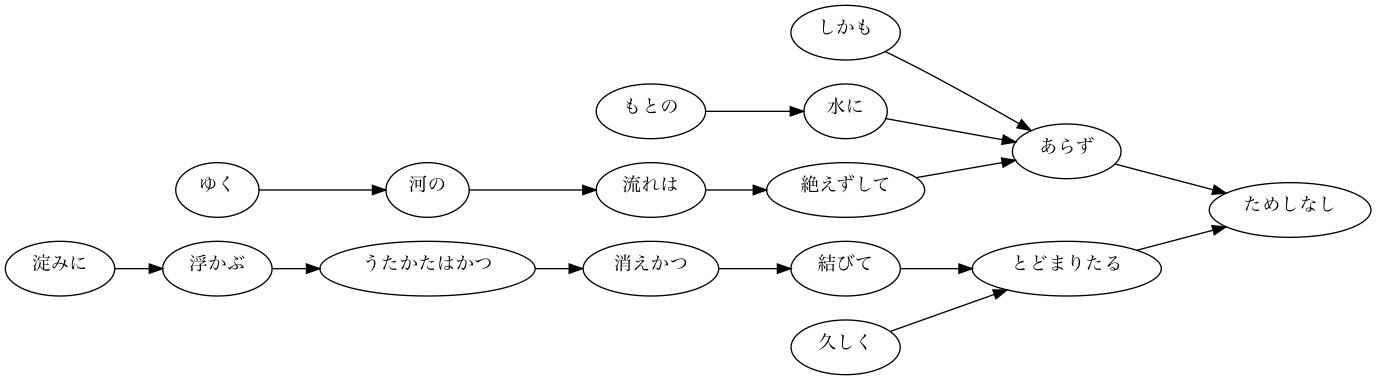

In [43]:
Image('graph0.jpg')

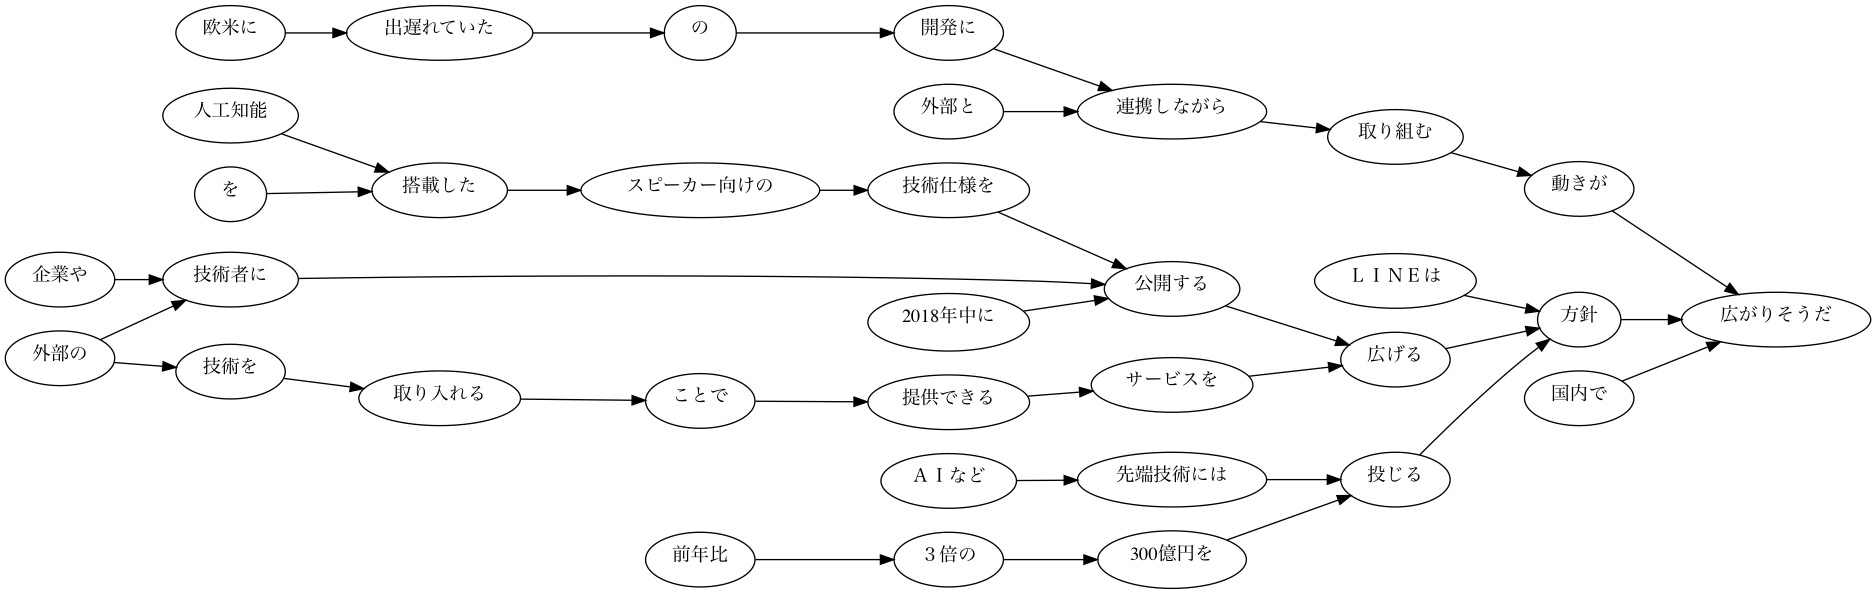

In [21]:
Image('graph1.jpg')

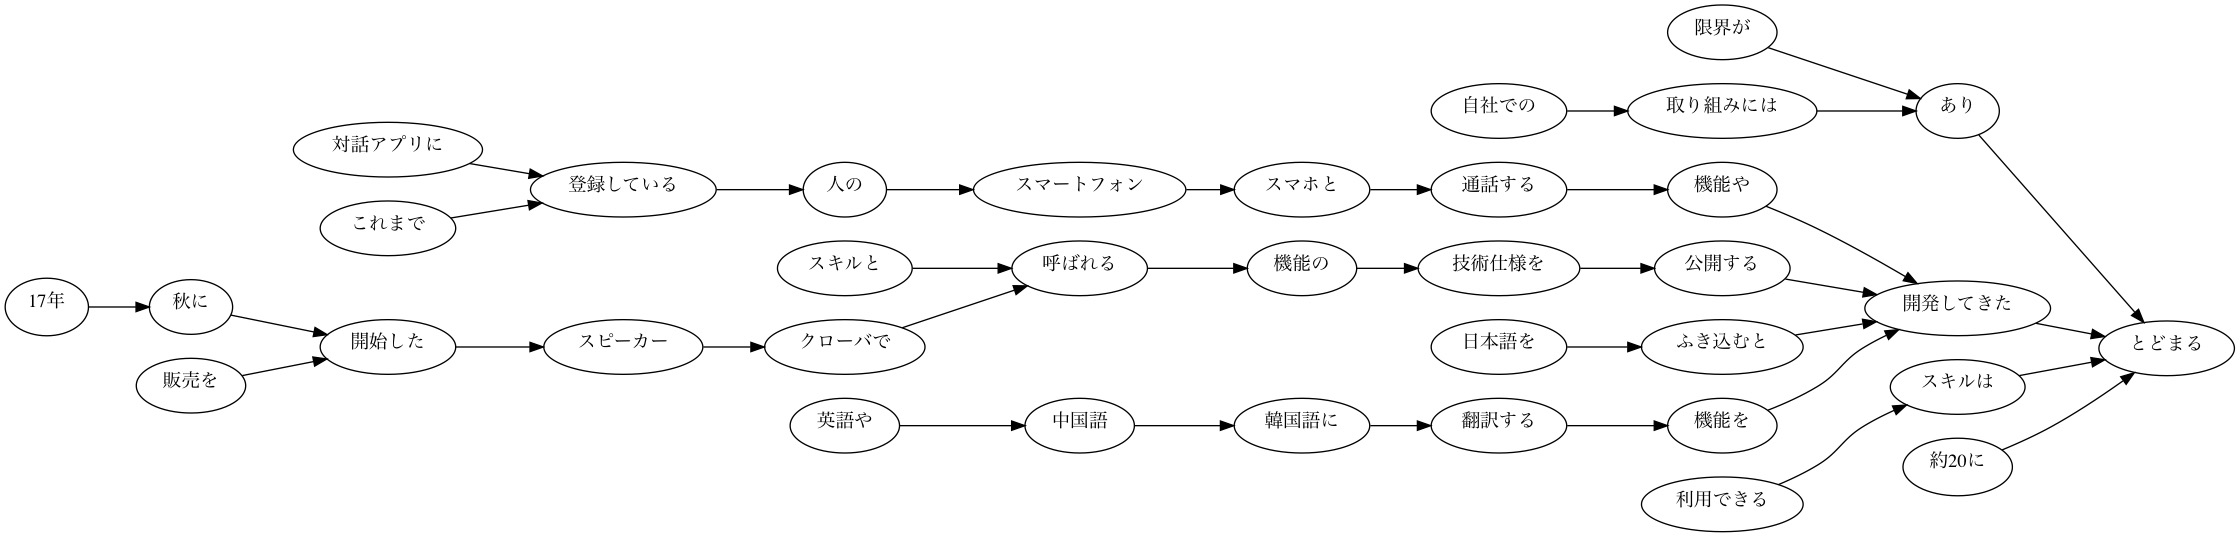

In [22]:
Image('graph2.jpg')

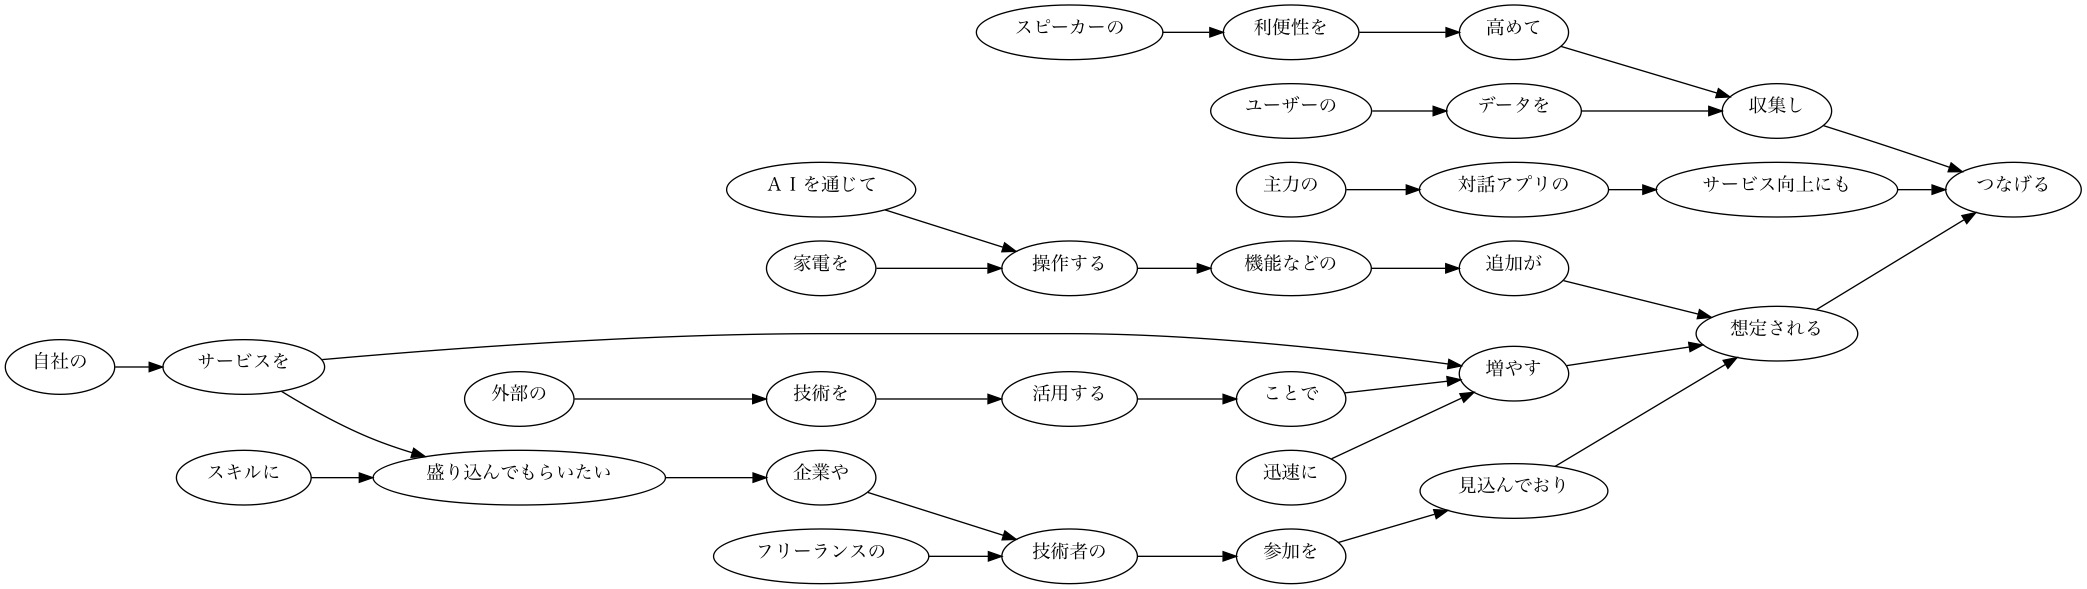

In [23]:
Image('graph3.jpg')

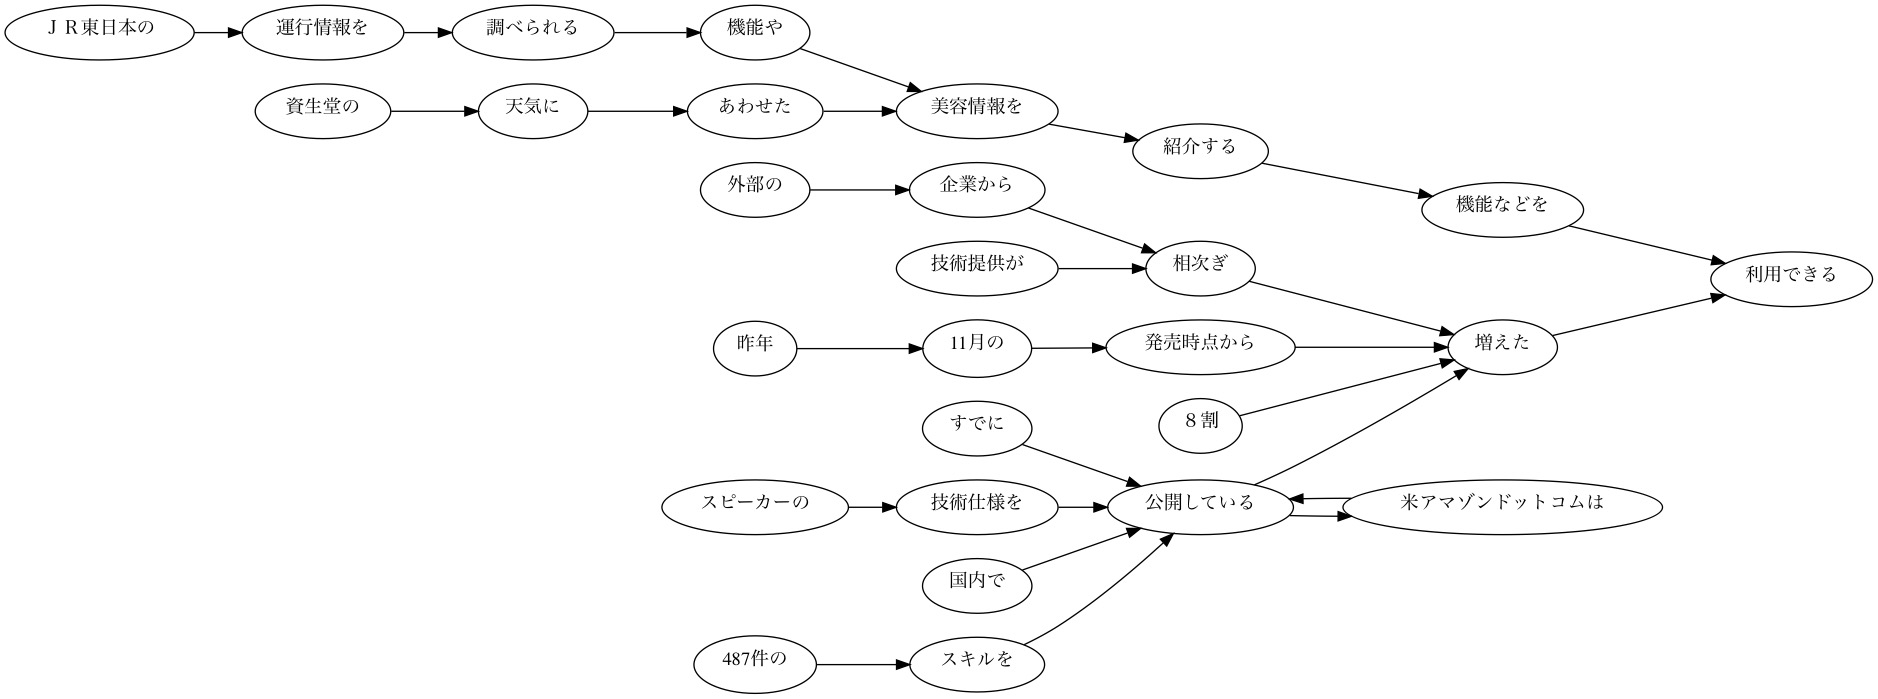

In [24]:
Image('graph4.jpg')

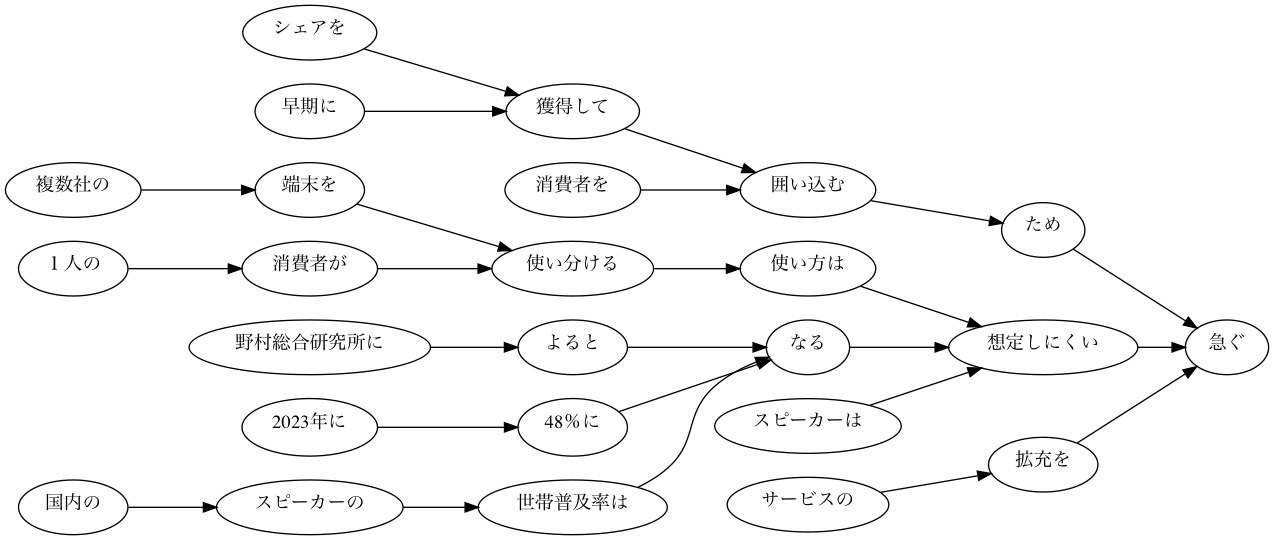

In [29]:
Image('graph9.jpg')

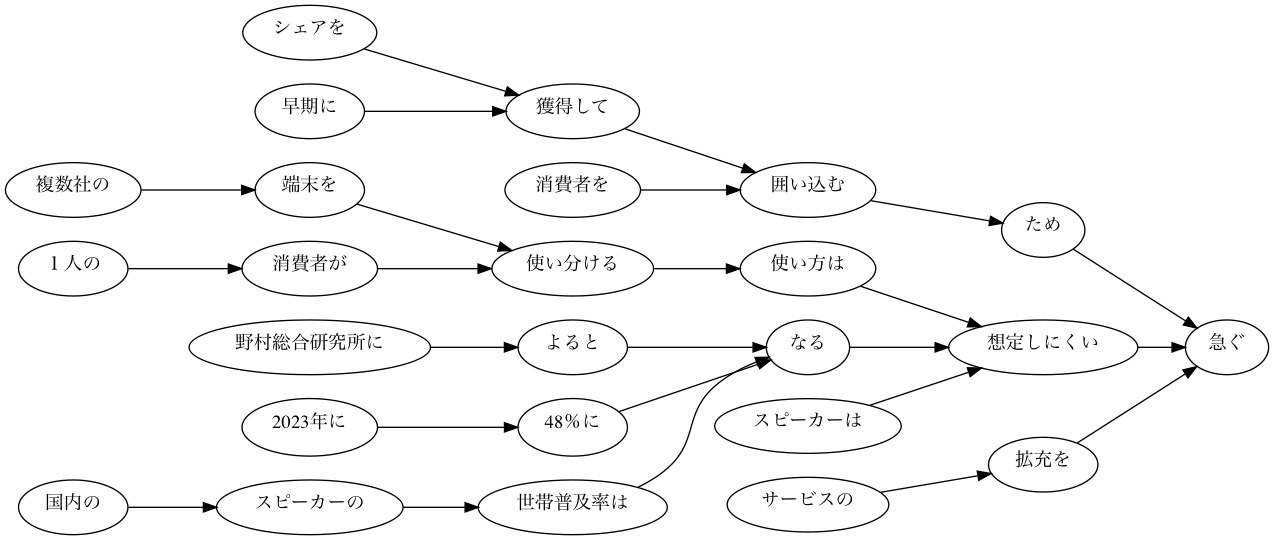

In [27]:
Image('graph9.jpg')

In [28]:
Image('graph10.jpg')

TypeError: a bytes-like object is required, not 'str'

TypeError: 'NoneType' object is not iterable

In [30]:
Image('graph11.jpg')

TypeError: a bytes-like object is required, not 'str'

TypeError: 'NoneType' object is not iterable